# Задание 1


In [681]:
import pandas as pd
import numpy as np
data = pd.read_csv("donations.csv", index_col= 1)
data = data.drop(index= data[data['TargetB'] == 0].index)
data

,TargetB,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
ID,,,,,,,,,,,,,,,,,,,,,
46110,1,4.0,6,41,3,20,6.0,5.17,3.73,5.00,...,22,S,1,0,NaN,M,U,87600,36,38750.0
185937,1,10.0,3,12,3,8,10.0,8.67,8.50,8.67,...,16,E,1,0,NaN,M,U,139200,27,38942.0
112632,1,11.0,3,11,2,9,11.0,10.33,8.27,8.00,...,22,S,1,0,47.0,M,H,253100,0,92514.0
19094,1,40.0,1,3,0,1,35.0,35.00,28.33,NaN,...,22,A,0,35,NaN,F,U,137300,32,NaN
102224,1,6.0,3,16,2,13,6.0,6.33,6.13,6.00,...,21,S,1,15,NaN,U,U,143900,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184644,1,20.0,1,1,1,1,25.0,25.00,25.00,25.00,...,7,F,0,41,71.0,M,U,159400,20,NaN
184690,1,20.0,1,1,0,0,15.0,15.00,15.00,NaN,...,6,F,0,27,NaN,M,U,77800,18,NaN
184723,1,10.0,1,4,1,3,20.0,20.00,16.25,20.00,...,18,A,0,40,28.0,M,U,103700,39,NaN


In [682]:
from sklearn.impute import SimpleImputer

X= data.drop(columns= ['TargetB', 'TargetD'])
y= data[['TargetB', 'TargetD']]

y['TargetD'] = SimpleImputer(fill_value= 0, strategy= 'constant').fit_transform(y[['TargetD']])

/tmp/ipykernel_15602/3343974166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['TargetD'] = SimpleImputer(fill_value= 0, strategy= 'constant').fit_transform(y[['TargetD']])


# Задача 2

In [683]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

def Stratification_data(X, y):
    discretizer = KBinsDiscretizer(n_bins= 5,
                                   strategy= 'quantile',
                                   encode= 'ordinal')
    y_binned = discretizer.fit_transform(y[['TargetD']].fillna(value= 0))
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size= 0.3,
                                                        stratify= y_binned)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = Stratification_data(X= X, y= y)

# Задача 3


In [684]:
from sklearn.impute import KNNImputer 

def KNN_Imputer(X: pd.DataFrame, with_return_col_category= False):
    print("Всего пропусков было:")
    temp_columns_where_nan_value = X.isna().sum()
    print(temp_columns_where_nan_value[temp_columns_where_nan_value > 0])
    
    mask = ~(X.dtypes == np.object_)
    imputer = KNNImputer(n_neighbors= 5,
                         weights= 'distance',
                         add_indicator= True) # Показывает, где раньше были пропуски
    
    col_name = ['is_changed' + el for el in mask.index[temp_columns_where_nan_value > 0].to_list()]# столбцы по которым были совершены изменения / вставки значений

    temp_df = pd.DataFrame(data= imputer.fit_transform(X.T[mask].T),
                           columns= mask[mask == True].index.to_list() + col_name,
                           index= X.index)

    if with_return_col_category:
        return pd.concat([temp_df, X.T[~mask].T], axis= 1, join= 'inner'), mask[~(mask == True)].index, col_name

    
    return pd.concat([temp_df, X.T[~mask].T], axis= 1, join= 'inner'), col_name

X_train, category_col, col_name_is_changed = KNN_Imputer(X_train, with_return_col_category= True)
X_train

Всего пропусков было:
GiftAvgCard36    514
DemAge           814
DemMedIncome     792
dtype: int64


,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,...,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,is_changedGiftAvgCard36,is_changedDemAge,is_changedDemMedIncome,StatusCat96NK,DemGender,DemHomeOwner
ID,,,,,,,,,,,,,,,,,,,,,
63612,1.0,2.0,0.0,0.0,16.0,16.00,13.50,10.358033,18.0,40.0,...,29.000000,41600.0,0.0,43357.000000,1.0,0.0,0.0,A,F,U
19621,3.0,4.0,2.0,2.0,19.0,14.33,12.00,12.000000,15.0,44.0,...,70.000000,51700.0,27.0,46573.000000,0.0,0.0,0.0,E,F,H
84097,1.0,1.0,1.0,1.0,25.0,25.00,25.00,25.000000,17.0,17.0,...,87.000000,341000.0,41.0,105995.000000,0.0,0.0,0.0,F,F,H
108420,5.0,11.0,3.0,6.0,20.0,9.20,8.91,7.330000,18.0,54.0,...,64.000000,65000.0,27.0,25673.000000,0.0,0.0,0.0,A,F,H
69577,3.0,5.0,1.0,2.0,10.0,8.00,7.20,7.000000,19.0,45.0,...,37.000000,97300.0,32.0,67442.627080,0.0,0.0,1.0,A,M,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119966,1.0,17.0,1.0,14.0,11.0,11.00,8.06,11.000000,19.0,121.0,...,64.000000,32100.0,30.0,34917.890594,0.0,0.0,1.0,A,F,H
188627,2.0,8.0,1.0,3.0,25.0,37.50,26.88,50.000000,5.0,54.0,...,60.039044,344300.0,24.0,95343.191585,0.0,1.0,1.0,A,F,U
160997,3.0,4.0,2.0,3.0,10.0,6.67,5.75,7.500000,16.0,40.0,...,55.545716,115800.0,34.0,64893.829006,0.0,1.0,1.0,A,M,U


1

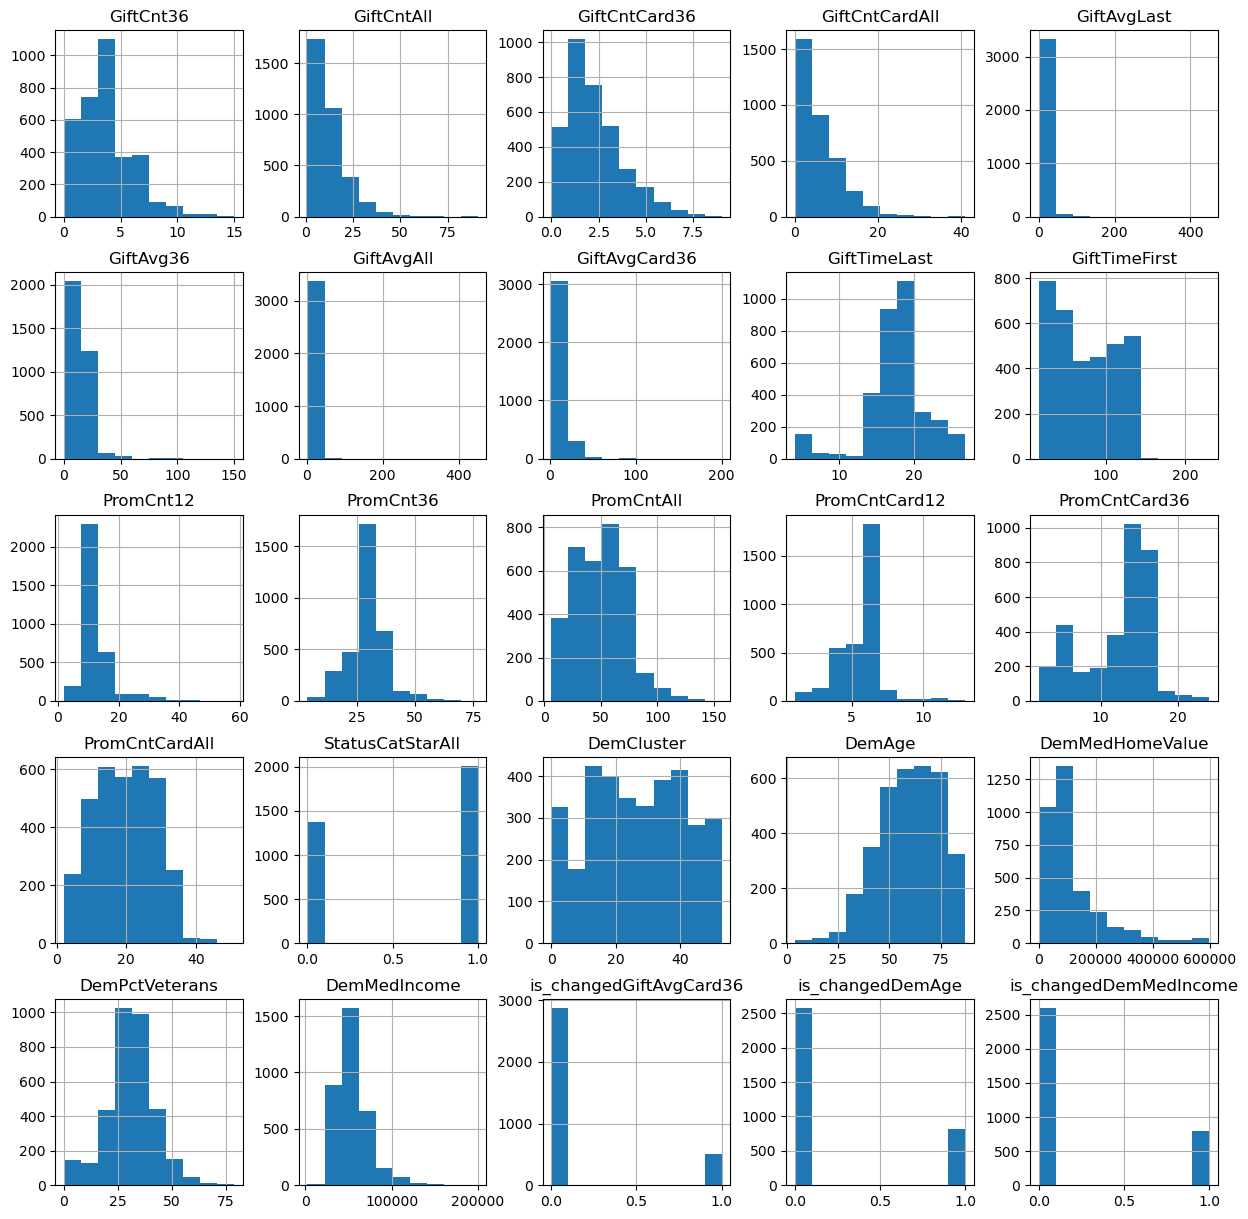

In [685]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
def category_encoding(X, y, cols, encoder = 'one_hot'):
    match encoder:

        case 'WOE':
            incoder = ce.WOEEncoder(cols= cols)
            return incoder.fit_transform(X, y)
        
        case 'one_hot':
            return pd.concat([X.drop(cols, axis=1), pd.get_dummies(X[cols])], axis=1)

X_train = category_encoding(X_train, y_train['TargetB'], category_col)

X_train.hist(figsize= (15, 15))
1

/tmp/ipykernel_15602/2836728091.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X[log_columns].applymap(np.log1p)


1

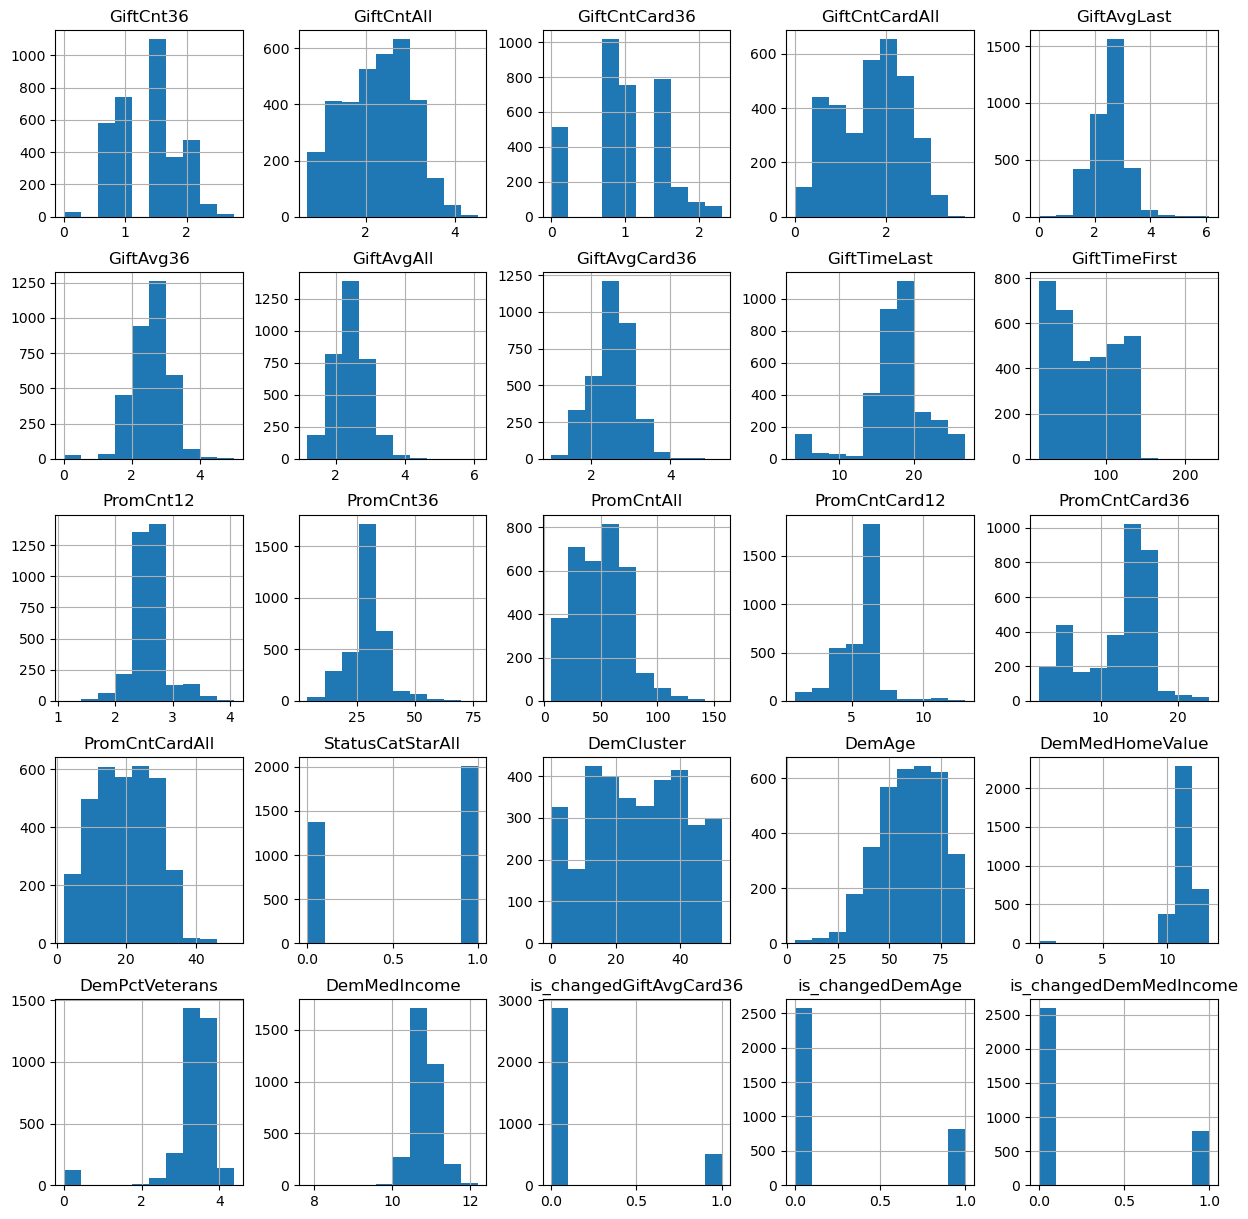

In [686]:
LOG_COLUMNS = [
    "GiftCnt36",
    "GiftCntAll",
    "GiftCntCard36",
    "GiftCntCardAll",
    "PromCnt12",
    "GiftAvgLast",
    "GiftAvg36",
    "GiftAvgAll",
    "GiftAvgCard36",
    "DemMedHomeValue",
    "DemPctVeterans",
    "DemMedIncome"
]

def log_encoding(X:pd.DataFrame, log_columns):
    return X[log_columns].applymap(np.log1p)

X_train[LOG_COLUMNS] = log_encoding(X_train, LOG_COLUMNS)
X_train.hist(figsize= (15, 15))
1

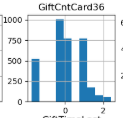 <- если прологорифмировать, но это нормально, т.к. данные дискратизированы.

Добавил снизу стандартизацию:

1

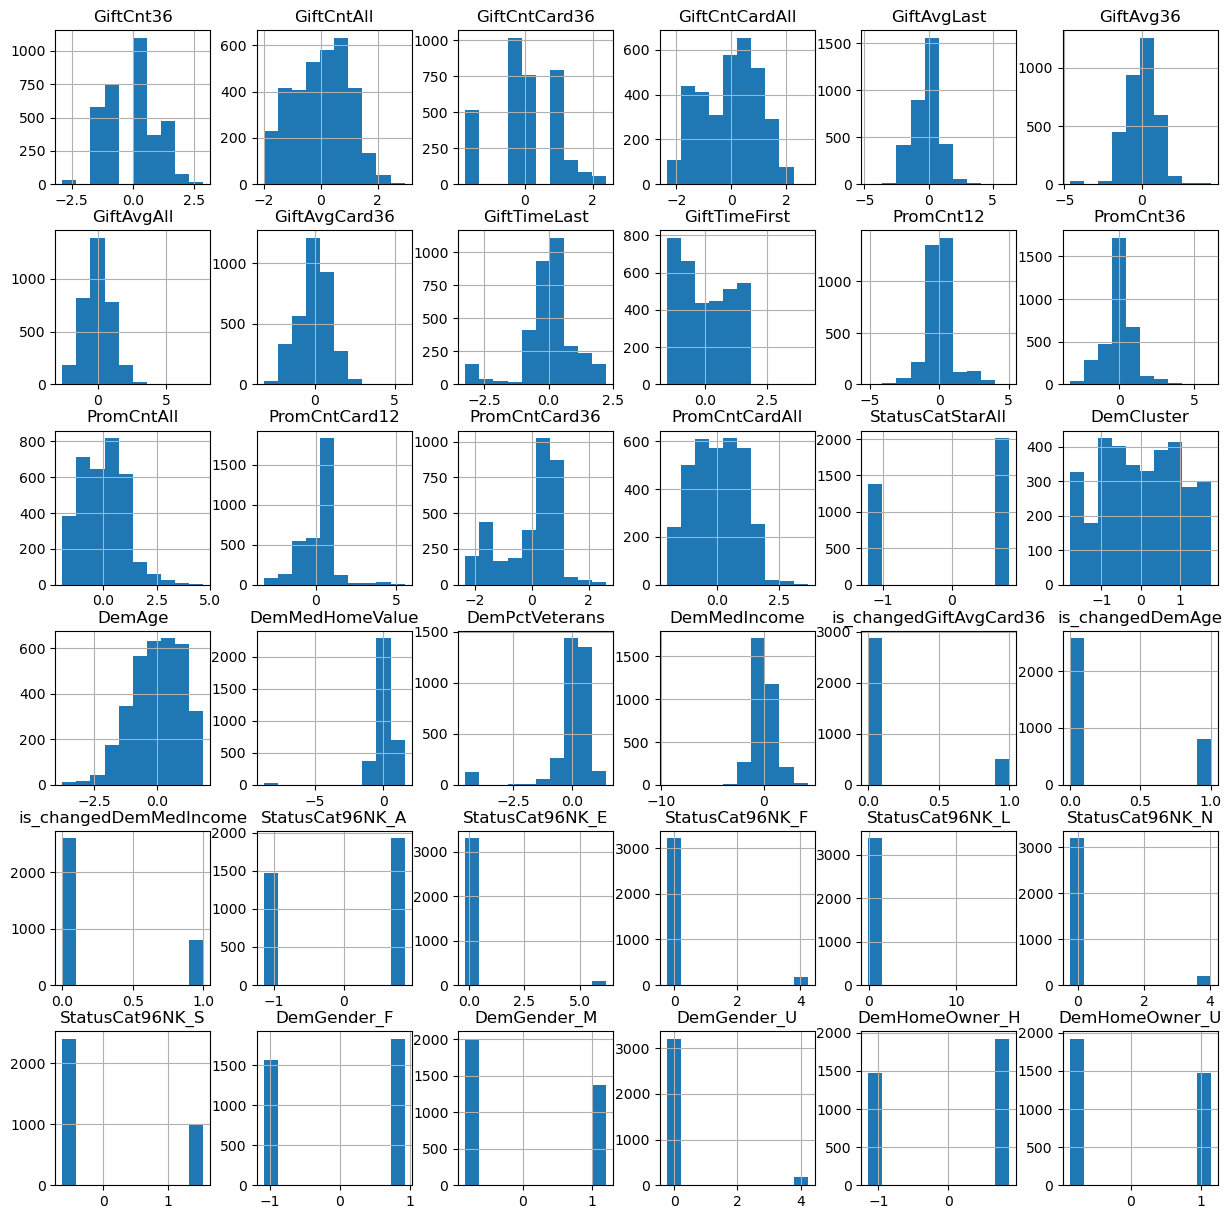

In [687]:
col_name_is_not_changed = [col for col in X_train.columns if col not in col_name_is_changed and col not in category_col] # столбцы в которых нет информации об изменении столбцов с помощью KNNIMPUTER...
scaler = StandardScaler()
normalized_data = scaler.fit_transform(X_train[col_name_is_not_changed], y_train['TargetB'])

X_train[col_name_is_not_changed] = pd.DataFrame(normalized_data, columns=col_name_is_not_changed,index=X_train.select_dtypes(['float', 'int']).index ) 

X_train.hist(figsize= (15, 15))
1

# Задание 4

In [688]:
from sklearn.linear_model import LarsCV

def choose_important_col(X, y):
    lars_cv = LarsCV(cv= 5)
    lars_cv.fit(X, y)
    
    return lars_cv, X.columns[np.where(lars_cv.coef_ != 0)] # отбор важных переменных 

    # атрибут coef_ содержит коэффициенты перед параметрами в линейной регрессии
    # т.е. то как влияет этот признак на Целевую переменную

lars, IMPORTANT_COL = choose_important_col(X_train[col_name_is_not_changed], y_train['TargetD'])
X_after_use_lars = X_train[IMPORTANT_COL]
X_after_use_lars


,GiftCnt36,GiftCntAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,PromCntCard12,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,StatusCat96NK_N,DemGender_F,DemHomeOwner_H,DemHomeOwner_U
ID,,,,,,,,,,,,,,,
63612,-1.442594,-1.476118,0.389235,0.496476,0.528537,-0.220632,-1.045163,0.024718,-2.088970,-0.509966,-4.545861,-0.249058,0.922739,-1.144919,1.144919
19621,-0.005051,-0.816929,0.681459,0.308700,0.301511,0.054255,-1.776605,0.362874,0.688608,-0.343034,0.015831,-0.249058,0.922739,0.873425,-0.873425
84097,-1.442594,-1.999345,1.153214,1.268059,1.742571,1.465392,-0.313722,-0.922118,1.840287,1.105764,0.570901,-0.249058,0.922739,0.873425,-0.873425
108420,0.835858,0.312808,0.769188,-0.431176,-0.262743,-0.851868,0.417720,-0.110544,0.282133,-0.167215,0.015831,-0.249058,0.922739,0.873425,-0.873425
69577,-0.005051,-0.581655,-0.393506,-0.658471,-0.656529,-0.934161,0.417720,1.174448,-1.547003,0.142609,0.240757,-0.249058,-1.083730,-1.144919,1.144919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119966,-1.442594,0.836035,-0.237052,-0.136044,-0.449179,-0.108699,-1.045163,0.971554,0.282133,-0.709065,0.155168,-0.249058,0.922739,0.873425,-0.873425
188627,-0.601685,-0.058428,1.153214,1.980946,1.887713,2.836996,1.880603,-1.666060,0.013795,1.113160,-0.139313,-0.249058,0.922739,-1.144919,1.144919
160997,-0.005051,-0.816929,-0.393506,-0.948862,-1.061087,-0.810739,0.417720,1.174448,-0.290609,0.276293,0.321308,-0.249058,-1.083730,-1.144919,1.144919


Best MSE= 86.02


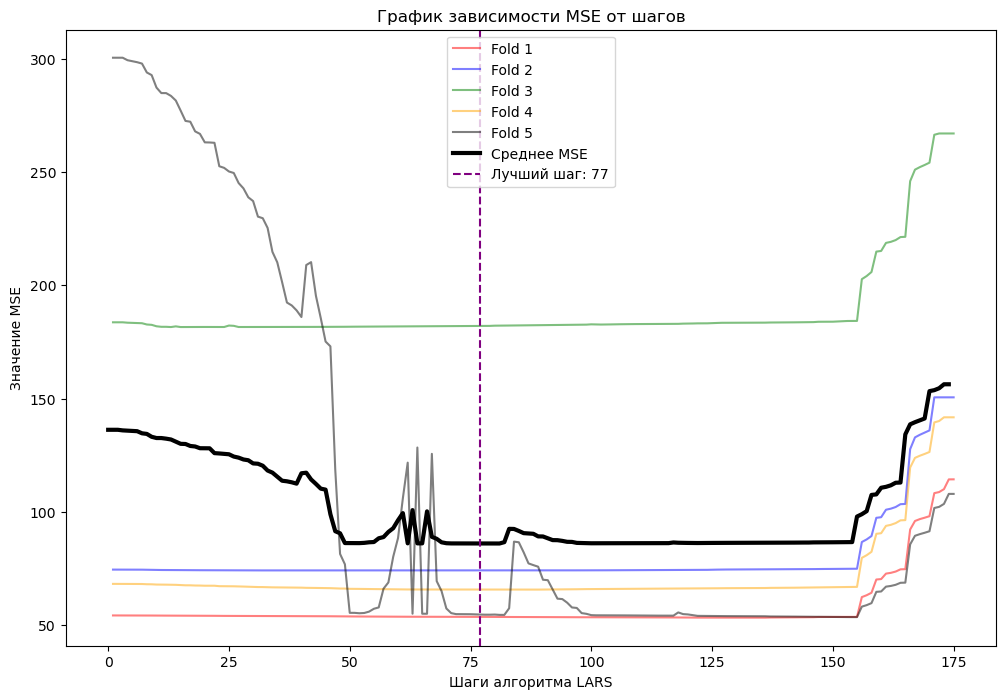

In [689]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i, one_fold in enumerate(lars.mse_path_.T):
    plt.plot(range(1, len(one_fold) + 1), one_fold, 
             label= f'Fold {i + 1}',
             color= colors[i],
             alpha= 0.5)

mean_mse = np.mean(lars.mse_path_, axis=1)
plt.plot(mean_mse, 
         color='black', 
         linewidth=3, 
         label='Среднее MSE')

best_step = np.argmin(mean_mse)
plt.axvline(best_step, 
            color='purple', 
            linestyle='--',
            label=f'Лучший шаг: {best_step}')
print(f"Best MSE= {mean_mse[best_step]:.2f}")
plt.xlabel('Шаги алгоритма LARS')
plt.ylabel('Значение MSE')
plt.title('График зависимости MSE от шагов')
plt.legend()
plt.show()

много шагов сделано в каждом FOLD, т.к. помимо отбора переменных LARS делает микрокорректировки 

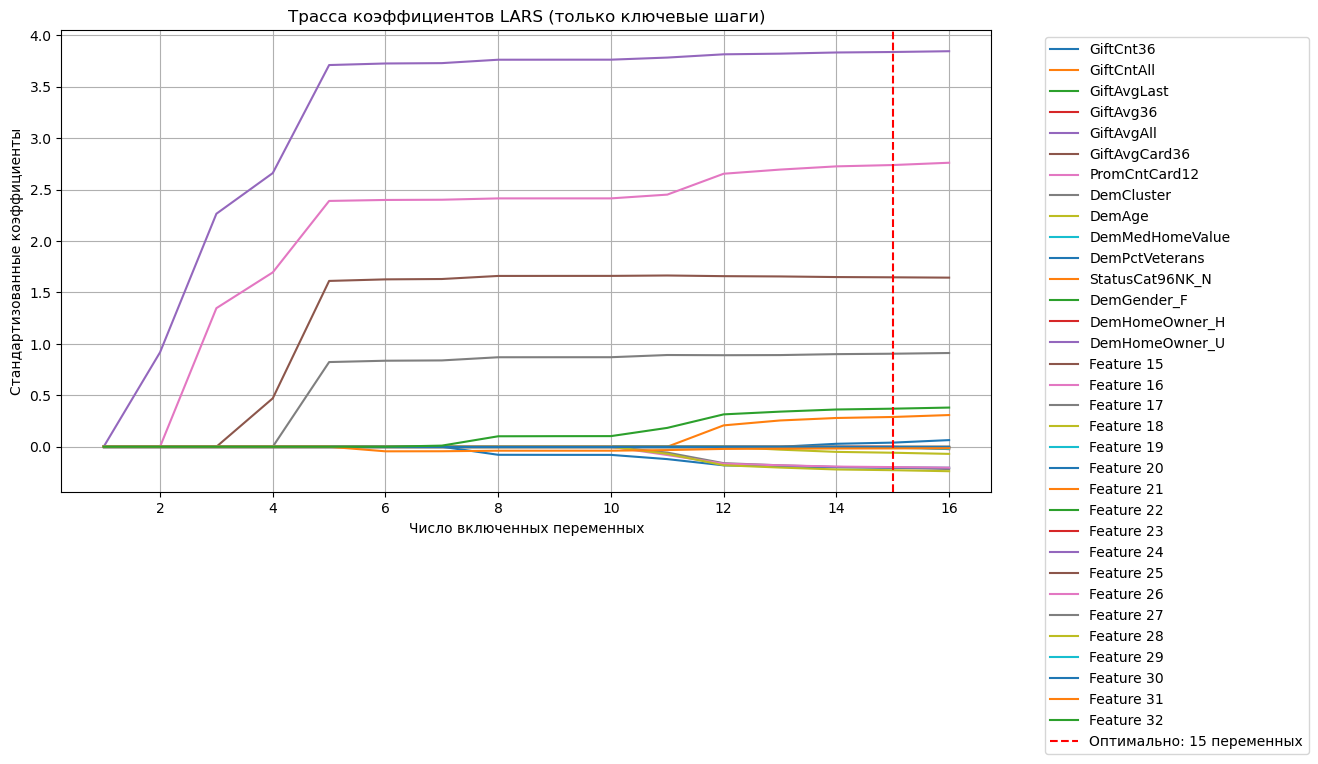

In [690]:
# Рассчитываем число активных признаков на каждом из 16 шагов

plt.figure(figsize=(12, 6))

# Рисуем траекторию каждого коэффициента
for i in range(lars.coef_path_.shape[0]):
    plt.plot(range(1, len(lars.coef_path_[i, :]) + 1), lars.coef_path_[i, :], 
             label=f'{IMPORTANT_COL[i]}' if i < len(IMPORTANT_COL) else f'Feature {i}')

# Отмечаем оптимальную модель
optimal_vars = len(IMPORTANT_COL)
plt.axvline(optimal_vars, color='red', linestyle='--',
           label=f'Оптимально: {optimal_vars} переменных')

plt.xlabel('Число включенных переменных')
plt.ylabel('Стандартизованные коэффициенты')
plt.title('Трасса коэффициентов LARS (только ключевые шаги)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

## Порядок выбора признаков:


In [691]:
select_col = X_train.columns[lars.active_]
select_col
# в lars.active_ - хранится порядок добавления признаков

Index(['GiftAvgLast', 'GiftAvgAll', 'GiftAvg36', 'GiftAvgCard36',
       'DemGender_F', 'DemGender_M', 'DemPctVeterans', 'DemCluster',
       'StatusCat96NK_L', 'StatusCat96NK_E', 'GiftCntAll', 'DemAge',
       'GiftCnt36', 'DemMedHomeValue', 'PromCntCard12'],
      dtype='object')

# Задание 5

/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=3.850e-01, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=1.123e-01, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=4.004e-02, with an active se

Mean_OOB_MSE = 87.51


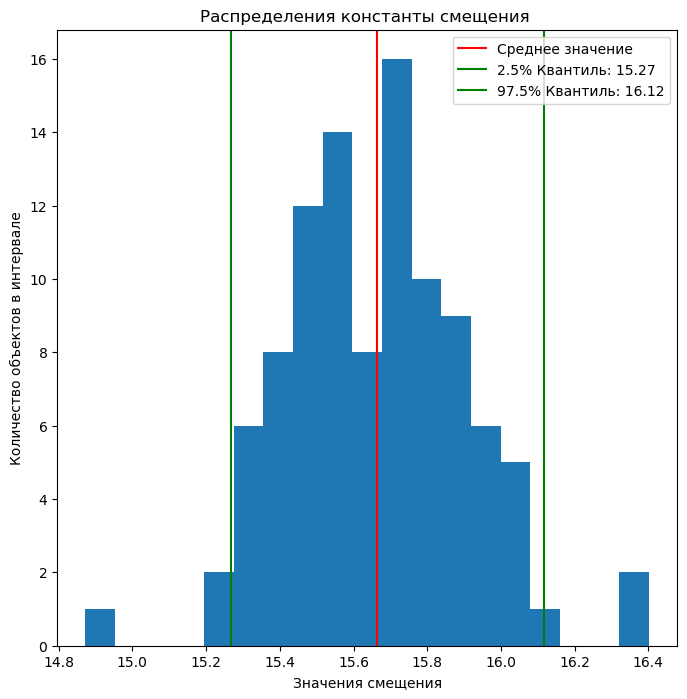

In [692]:
import scipy.stats as ss
from sklearn.metrics import mean_squared_error 
N_BOOTSRAP = 100

intercepts = []
oob_mse = []
plt.figure(figsize=(8, 8))

for _ in range(N_BOOTSRAP):
    X_samples = X_after_use_lars.sample(frac= 0.25, # 25% выборки
                                        replace=  False) # Нельзя выбирать одни и теже данные
    y_sample = y_train.loc[X_samples.index]
    
    OOB_sample_mask = ~X_after_use_lars.index.isin(X_samples.index)
    OOB_samples = X_after_use_lars.loc[OOB_sample_mask]

    temp_lars = LarsCV(cv= 5)
    temp_lars.fit(X_samples, y_sample['TargetD'])

    intercepts.append(temp_lars.intercept_)

    oob_mse.append(mean_squared_error(y_true= y_train['TargetD'][OOB_sample_mask], 
                                      y_pred= temp_lars.predict(OOB_samples)))

# Посчитаем среднее значение и 95% интервал
mean = np.mean(intercepts)
interval = (np.quantile(a= intercepts, q= 0.025),
            np.quantile(a= intercepts, q= 0.975))

print(f"Mean_OOB_MSE = {np.mean(oob_mse):.2f}")

# Визуализация
plt.hist(x= intercepts, bins= np.linspace(start= min(intercepts), 
                                          stop= max(intercepts),
                                          num= 20))

plt.axvline(x= mean, color= 'red', label= 'Среднее значение')
plt.axvline(x= interval[0], color= 'green', label= f'2.5% Квантиль: {interval[0]:.2f}')
plt.axvline(x= interval[1], color= 'green', label= f'97.5% Квантиль: {interval[1]:.2f}')

plt.legend()
plt.title('Распределения константы смещения ')
plt.xlabel('Значения смещения')
plt.ylabel('Количество объектов в интервале')
plt.show()
1

In [693]:
X_test, _ = KNN_Imputer(X_test)
X_test = category_encoding(X_test, y_test['TargetB'], category_col)
X_test[LOG_COLUMNS] = log_encoding(X_test, LOG_COLUMNS)
X_test = pd.DataFrame(scaler.fit_transform(X_test, y_test),
                      columns= X_test.columns,
                      index= X_test.index)

Всего пропусков было:
GiftAvgCard36    218
DemAge           350
DemMedIncome     391
dtype: int64


/tmp/ipykernel_15602/2836728091.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X[log_columns].applymap(np.log1p)


In [694]:
mse_for_test_data = mean_squared_error(y_true= y_test['TargetD'], 
                                       y_pred= lars.predict(X_test[col_name_is_not_changed]))
print(f'MSE на тестовом наборе данных = {mse_for_test_data:.2f}')

MSE на тестовом наборе данных = 80.30


In [695]:
X_test

,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,...,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemGender_F,DemGender_M,DemGender_U,DemHomeOwner_H,DemHomeOwner_U
ID,,,,,,,,,,,,,,,,,,,,,
27338,0.453229,1.072813,-0.515271,0.648224,-1.168706,-0.892539,-1.135980,-1.549800,-0.336316,1.295177,...,-0.180814,-0.238175,-0.052541,-0.218139,1.656757,-1.073589,-0.818605,3.846229,-1.084043,1.084043
8240,-0.611145,1.388272,-0.515271,1.163972,-0.385994,-0.111962,0.079105,-0.302668,-2.400137,0.409492,...,-0.180814,-0.238175,-0.052541,-0.218139,1.656757,-1.073589,-0.818605,3.846229,-1.084043,1.084043
64203,1.897495,1.787735,2.177998,1.964184,-1.751382,-1.086676,-0.976320,-1.123866,-0.565629,1.483050,...,-0.180814,-0.238175,-0.052541,-0.218139,1.656757,-1.073589,1.221590,-0.259995,-1.084043,1.084043
69034,-2.900253,-2.063820,-1.756451,-2.433470,1.103633,-4.856736,1.757451,0.582507,1.268878,-1.388716,...,-0.180814,-0.238175,-0.052541,4.584229,-0.603589,-1.073589,1.221590,-0.259995,0.922472,-0.922472
4544,0.453229,1.821713,-0.515271,0.795996,0.733783,0.971251,1.276731,1.027776,-1.941510,1.268338,...,-0.180814,-0.238175,-0.052541,-0.218139,-0.603589,-1.073589,1.221590,-0.259995,-1.084043,1.084043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140632,-0.611145,-0.626750,-1.756451,-0.892623,0.367854,0.100935,0.615795,0.347891,-0.565629,0.167942,...,-0.180814,-0.238175,-0.052541,-0.218139,-0.603589,0.931455,-0.818605,-0.259995,-1.084043,1.084043
126333,1.432545,1.340700,0.725910,0.929672,-1.435652,-1.089202,-0.997127,-1.044563,-0.565629,1.268338,...,-0.180814,-0.238175,-0.052541,-0.218139,1.656757,-1.073589,1.221590,-0.259995,-1.084043,1.084043
157573,-1.455987,-0.096370,-1.756451,0.079543,2.165358,2.415611,2.764699,0.688658,-2.400137,0.999949,...,-0.180814,-0.238175,-0.052541,-0.218139,-0.603589,-1.073589,-0.818605,3.846229,-1.084043,1.084043


# Задание 6

In [696]:
from sklearn.linear_model import GammaRegressor
from sklearn.experimental import enable_halving_search_cv # добавляет в model_selection HalvingRansomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X_train = X_train[select_col]
X_test = X_test[select_col]

pipeline = Pipeline([('polynom', PolynomialFeatures()),
                     ("gamma", GammaRegressor(max_iter=1000,  # Увеличиваем количество итераций
                                              tol=1e-4,       # Более мягкий критерий сходимости
                    ))])

param_dist = {'polynom__degree' : [2, 3, 4],
              'gamma__alpha':  [0.1, 0.25, 0.5, 1, 2, 5, 10, 20]}

search = HalvingRandomSearchCV(estimator=  pipeline,
                                param_distributions= param_dist,
                                cv= 5)
search.fit(X_train, y_train['TargetD'] + 1e-6)

/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=339. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


HalvingRandomSearchCV(estimator=Pipeline(steps=[('polynom',
                                                 PolynomialFeatures()),
                                                ('gamma',
                                                 GammaRegressor(max_iter=1000))]),
                      param_distributions={'gamma__alpha': [0.1, 0.25, 0.5, 1,
                                                            2, 5, 10, 20],
                                           'polynom__degree': [2, 3, 4]})

# Задание 7

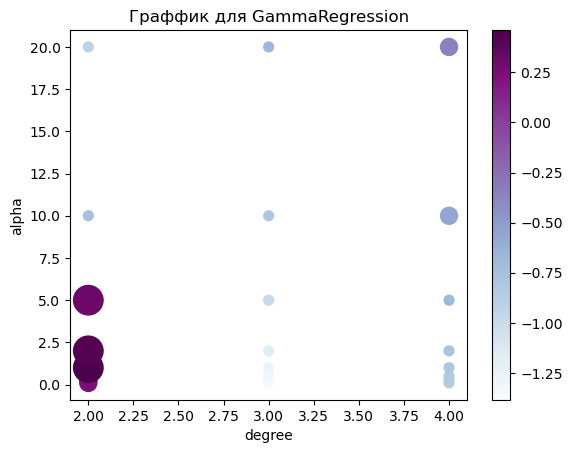

In [697]:
results = search.cv_results_

params = results['params']
scores = results['mean_test_score']
n_iter = results['n_resources']


x_axis = [el['polynom__degree'] for el in params]
y_axis = [el['gamma__alpha'] for el in params]

scatter = plt.scatter(x= x_axis,
            y= y_axis,
            c= scores,
            cmap= 'BuPu',
            s= n_iter * 5)

plt.ylabel("alpha")
plt.xlabel("degree")
plt.title('Граффик для GammaRegression')
plt.colorbar(scatter)
plt.show()

/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=339. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/tmp/ipykernel_15602/4278935129.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


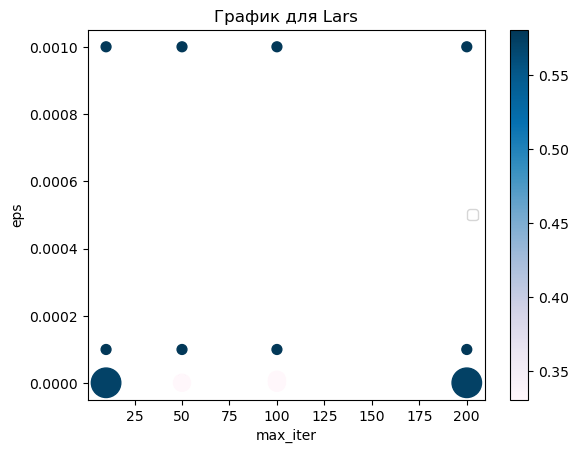

In [698]:
model = LarsCV(cv= 5)

param_grid = {
    'max_iter': [10, 50, 100, 200],
    'eps': [1e-3, 1e-4, 1e-5, 1e-6]
}

search_lars = HalvingRandomSearchCV(estimator= model,
                                    param_distributions= param_grid,
                                    cv= 5)

search_lars.fit(X_train, y_train['TargetD'])

res = search_lars.cv_results_
params = res['params']
scores = res["mean_train_score"]
n_iter_lars = res["n_resources"]

x_axis= [el['max_iter'] for el in params]
y_axis = [el['eps'] for el in params]

scatter = plt.scatter(x= x_axis,
            y= y_axis,
            s= n_iter_lars * 5,
            c= scores,
            cmap= 'PuBu')

plt.colorbar(scatter)

plt.legend()
plt.title("График для Lars")
plt.xlabel("max_iter")
plt.ylabel("eps")
plt.show()

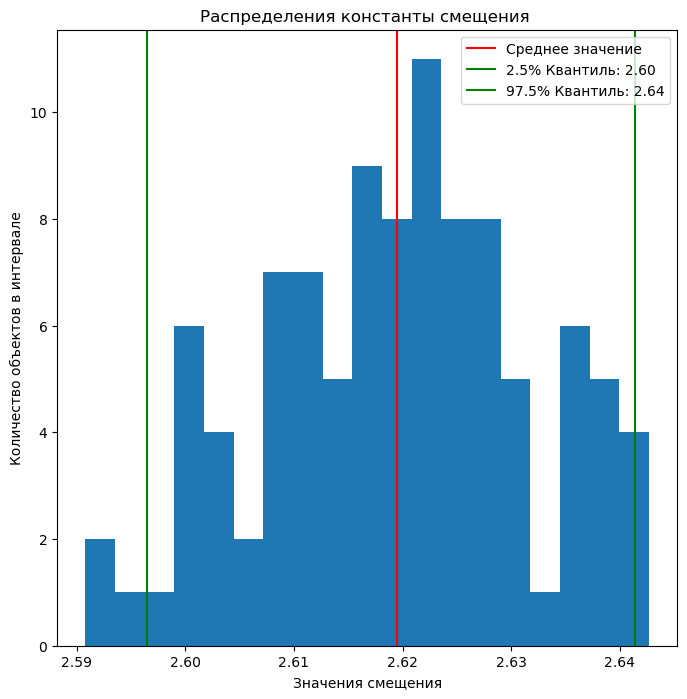

Mean_OOB_MSE = 82.78


In [699]:
intercepts = []
oob_mse = []
plt.figure(figsize=(8, 8))

for _ in range(N_BOOTSRAP):
    X_samples = X_after_use_lars.sample(frac= 0.25, # 25% выборки
                                        replace=  False) # Нельзя выбирать одни и теже данные
    y_sample = y_train.loc[X_samples.index]
    
    OOB_sample_mask = ~X_after_use_lars.index.isin(X_samples.index)
    OOB_samples = X_after_use_lars.loc[OOB_sample_mask]

    temp_gamma = GammaRegressor(alpha=search.best_params_['gamma__alpha'])
    temp_gamma.fit(X_samples, y_sample['TargetD'] + 1e-6)

    intercepts.append(temp_gamma.intercept_)

    oob_mse.append(mean_squared_error(y_true= y_train['TargetD'][OOB_sample_mask] + 1e-6, 
                                      y_pred= temp_gamma.predict(OOB_samples)))

# Посчитаем среднее значение и 95% интервал
mean = np.mean(intercepts)
interval = (np.quantile(a= intercepts, q= 0.025),
            np.quantile(a= intercepts, q= 0.975))

# Визуализация
plt.hist(x= intercepts, bins= np.linspace(start= min(intercepts), 
                                          stop= max(intercepts),
                                          num= 20))

plt.axvline(x= mean, color= 'red', label= 'Среднее значение')
plt.axvline(x= interval[0], color= 'green', label= f'2.5% Квантиль: {interval[0]:.2f}')
plt.axvline(x= interval[1], color= 'green', label= f'97.5% Квантиль: {interval[1]:.2f}')

plt.legend()
plt.title('Распределения константы смещения ')
plt.xlabel('Значения смещения')
plt.ylabel('Количество объектов в интервале')
plt.show()
print(f"Mean_OOB_MSE = {np.mean(oob_mse):.2f}")

In [700]:
poly = PolynomialFeatures(degree=search.best_params_['polynom__degree'])
temp_df = poly.fit_transform(X_train) 
temp_df_test = poly.transform(X_test) 

gamma_reg = GammaRegressor(alpha=search.best_params_['gamma__alpha'])
gamma_reg.fit(temp_df, y_train['TargetD'] + 1e-6)

y_pred = gamma_reg.predict(temp_df_test)
mse = mean_squared_error(y_true=y_test['TargetD'] + 1e-6, y_pred=y_pred)

print(f"MSE: {mse:.2f}")

MSE: 69.50


In [704]:
np.var(y_train['TargetD'])

156.20529253105255